In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({
    'image.origin' : 'lower',
})
from matplotlib.colors import LogNorm

import poppy_utils as pu
from copy import deepcopy

# OAP relay

Pair of off-axis parabolae in an afocal setup

In [2]:
osys, wf, osys_dict = pu.load_optical_system('oap_relay.toml')
osys.describe()

	Entrance pupil diam:  0.06 m	npix: 256	Beam ratio:0.25
	Optic: Circle, radius=0.03 m
	Propagation distance:  0.994375 m
	Optic: OAP1
	Lens: Conic Wavefront Curvature Operator, with focal length 1.005625 m
	Propagation distance:  1.005625 m
	Optic: -empty-
	Propagation distance:  1.25703125 m
	Optic: OAP2
	Lens: Conic Wavefront Curvature Operator, with focal length 1.2570312499999998 m
	Propagation distance:  1.2746093729 m
	Optic: -empty-


In [4]:
roc_list = pu.inspect_osys_wf_roc(osys, wf, do_print=True)

0 0.0 m
1 -0.994375 m
2 1.0056249495101064 m
3 -5.048989359934808e-08 m
4 -1.2570313004898934 m
5 2.8283203154509353 m
6 1.5537109425509357 m


In [7]:
wfout, wflist = osys.propagate(deepcopy(wf), return_intermediates=True)

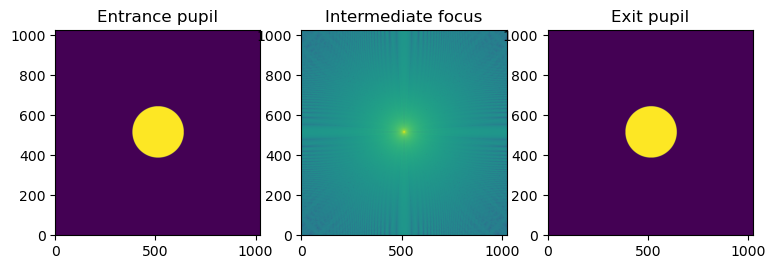

In [23]:
fig, axes = plt.subplots(1,3,figsize=(9,3))

ax = axes[0]
idx = 0
ax.imshow(wflist[idx].intensity)
ax.set_title('Entrance pupil')

ax = axes[1]
idx = 3
ax.imshow(wflist[idx].intensity, norm=LogNorm())
ax.set_title('Intermediate focus')

ax = axes[2]
idx = -1
ax.imshow(wflist[idx].intensity)
ax.set_title('Exit pupil')

plt.show()

# OAP-OAE relay

Off-axis parabola to focus a collimated beam, and then an off-axis ellipsoid to relay that focus

In [25]:
osys, wf, osys_dict = pu.load_optical_system('oap_oae_relay.toml')
osys.describe()

	Entrance pupil diam:  0.06 m	npix: 256	Beam ratio:0.25
	Optic: Circle, radius=0.03 m
	Propagation distance:  0.994375 m
	Optic: OAP1
	Lens: Conic Wavefront Curvature Operator, with focal length 1.005625 m
	Propagation distance:  1.005625 m
	Optic: -empty-
	Propagation distance:  1.3867600234 m
	Optic: OAE
	Lens: Conic Wavefront Curvature Operator, with focal length 1.00214245 m
	Propagation distance:  1.0132638996 m
	Optic: -empty-
	Propagation distance:  2.5999761429 m
	Detector plane: Detector (75x75 pixels, 10.000 micron / pix)


In [26]:
roc_list = pu.inspect_osys_wf_roc(osys, wf, do_print=True)

0 0.0 m
1 -0.994375 m
2 1.0056249495101064 m
3 -5.048989359934808e-08 m
4 -1.3867600738898935 m
5 3.6132790256859035 m
6 2.6000151260859035 m
7 3.898318590334071e-05 m


In [27]:
wfout, wflist = osys.propagate(deepcopy(wf), return_intermediates=True)

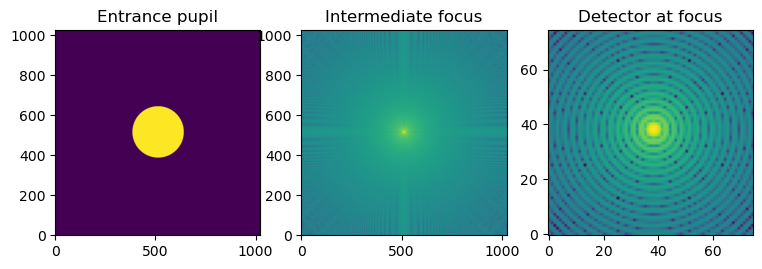

In [30]:
fig, axes = plt.subplots(1,3,figsize=(9,3))

ax = axes[0]
idx = 0
ax.imshow(wflist[idx].intensity)
ax.set_title('Entrance pupil')

ax = axes[1]
idx = 3
ax.imshow(wflist[idx].intensity, norm=LogNorm())
ax.set_title('Intermediate focus')

ax = axes[2]
idx = -1
ax.imshow(wflist[idx].intensity, norm=LogNorm())
ax.set_title('Detector at focus')

plt.show()

# Notes on optical systems


Translating from a Zemax design to an .toml optical system is straightforward for on-axis systems -- i.e., ROCs and thicknesses from the ray trace can typically be directly translated into ROCs and distances in the Fresnel system.

For off-axis systems, the approach will depend on how coordinate breaks are handled. A rule of thumb is:
* If the zemax design does not use coordinate returns (e.g., to the chief ray) after the off-axis optics, then the ROCs and thicknesses should be used directly and OADs (off-axis distances) should be ignored. This works even with a field bias.
* If the zemax design does use coordinate returns, then the thickness parameter will not give the correct result. Instead, the path length values can be extracted from a single ray trace (Hx=Hy=Px=Py=0) and the OADs should be used in the Fresnel model. This is how the OAP and OAE example notebooks work. This approach will break with a field bias.

When converting a Zemax design to a poppy optical system, you should compare the output of `poppy_utils.inspect_osys_wf_roc` with the Zemax Paraxial Gaussian Beam report. Note that you'll need to adjust the beam parameters to fill the aperture and may want to add dummy surfaces before/after optical elements to inspect the wavefront radii of curvature at intermediate points.
